In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, LSTM
from gensim import corpora, models
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [2]:
# Cargar los datos
entities_data = pd.read_csv('entities_train.csv', sep='\t')
relations_data = pd.read_csv('relations_train.csv', sep='\t')

In [3]:
# Eliminar filas con valores nulos si es necesario
entities_data = entities_data.dropna()
# Eliminar caracteres especiales y convertir a minúsculas
entities_data['mention'] = entities_data['mention'].apply(lambda x: x.lower())
entities_data['mention'] = entities_data['mention'].apply(
    lambda x: ''.join([char for char in x if char not in string.punctuation]))

# Tokenización y eliminación de palabras vacías (stopwords)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))


def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


entities_data['mention'] = entities_data['mention'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\estef\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\estef\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Eliminar filas con valores nulos
relations_data = relations_data.dropna()
# Convertir la columna 'type' a minúsculas
relations_data['type'] = relations_data['type'].str.lower()
# Eliminar caracteres especiales y convertir a minúsculas en entity_1_id y entity_2_id
relations_data['entity_1_id'] = relations_data['entity_1_id'].apply(lambda x: x.lower())
relations_data['entity_2_id'] = relations_data['entity_2_id'].apply(lambda x: x.lower())


In [5]:
# Renombrar las columnas 'type'
entities_data.rename(columns={'type': 'entity_type'}, inplace=True)
relations_data.rename(columns={'type': 'relation_type'}, inplace=True)

# Combinar los datos
combined_data = entities_data.merge(relations_data, on='abstract_id', how='inner')

In [6]:
# Preprocesamiento de texto
tfidf = TfidfVectorizer()
print(combined_data['mention'])
X = tfidf.fit_transform(combined_data['mention'])
print(X)
le = LabelEncoder()
y = le.fit_transform(combined_data['relation_type'])

0         metachromatic leukodystrophy
1         metachromatic leukodystrophy
2                        arylsulfatase
3                        arylsulfatase
4                                 arsa
                      ...             
178323                  renal fibrosis
178324                  renal fibrosis
178325                  renal fibrosis
178326                  renal fibrosis
178327                  renal fibrosis
Name: mention, Length: 178328, dtype: object
  (0, 2456)	0.7071067811865475
  (0, 2631)	0.7071067811865475
  (1, 2456)	0.7071067811865475
  (1, 2631)	0.7071067811865475
  (2, 570)	1.0
  (3, 570)	1.0
  (4, 561)	1.0
  (5, 561)	1.0
  (6, 2456)	0.7071067811865475
  (6, 2631)	0.7071067811865475
  (7, 2456)	0.7071067811865475
  (7, 2631)	0.7071067811865475
  (8, 2696)	1.0
  (9, 2696)	1.0
  (10, 553)	1.0
  (11, 553)	1.0
  (12, 570)	1.0
  (13, 570)	1.0
  (14, 2696)	1.0
  (15, 2696)	1.0
  (16, 1892)	0.5848721350088885
  (16, 553)	0.8111255055107961
  (17, 1892)	0.5848721350

In [7]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
for x in X_train:
    print(x)

  (0, 2004)	0.7478430225446508
  (0, 898)	0.6638756010212159
  (0, 1511)	1.0
  (0, 1219)	1.0
  (0, 1606)	1.0
  (0, 3138)	1.0
  (0, 2603)	0.8086805159345929
  (0, 3497)	0.5882480965951021
  (0, 3165)	1.0
  (0, 333)	1.0
  (0, 470)	1.0
  (0, 2022)	1.0
  (0, 3182)	0.7753402606348251
  (0, 1893)	0.6315437278912059
  (0, 1192)	1.0
  (0, 3793)	0.5792107198619174
  (0, 2507)	0.40818151599110536
  (0, 3846)	0.5490056042325758
  (0, 884)	0.44327828564172495
  (0, 1027)	1.0
  (0, 1539)	0.5509471890856099
  (0, 4192)	0.530353677969358
  (0, 1925)	0.4813862979623774
  (0, 1635)	0.42830993828898833
  (0, 926)	1.0
  (0, 1924)	1.0
  (0, 3084)	1.0
  (0, 3776)	1.0
  (0, 3089)	1.0
  (0, 3485)	1.0
  (0, 3676)	1.0

  (0, 4120)	1.0
  (0, 1730)	0.6048502970285113
  (0, 309)	0.6073632065476937
  (0, 1658)	0.515039856240879
  (0, 229)	1.0
  (0, 395)	1.0
  (0, 504)	1.0
  (0, 2981)	1.0
  (0, 461)	1.0
  (0, 1129)	0.6980660905110754
  (0, 1313)	0.7160333325192222
  (0, 395)	1.0
  (0, 659)	1.0
  (0, 1600)	1.0
  (0,

  (0, 3835)	1.0
  (0, 1580)	1.0
  (0, 1284)	1.0
  (0, 3234)	1.0
  (0, 2772)	1.0
  (0, 2085)	1.0
  (0, 333)	1.0
  (0, 1567)	1.0
  (0, 2887)	1.0
  (0, 2481)	1.0
  (0, 199)	1.0
  (0, 1002)	1.0
  (0, 3485)	1.0
  (0, 4208)	1.0
  (0, 1893)	1.0
  (0, 1819)	1.0
  (0, 1819)	1.0
  (0, 2501)	1.0
  (0, 193)	1.0
  (0, 1085)	1.0
  (0, 2595)	1.0
  (0, 2059)	0.5641692782973076
  (0, 3954)	0.588962734211247
  (0, 3214)	0.578650086957487
  (0, 2223)	1.0
  (0, 1974)	1.0
  (0, 2959)	0.6801597578179881
  (0, 430)	0.7330639152522622
  (0, 2593)	1.0
  (0, 2989)	1.0
  (0, 1309)	1.0
  (0, 3407)	0.6112728924896078
  (0, 564)	0.6315637641696612
  (0, 2117)	0.476940942565468
  (0, 1867)	1.0
  (0, 3573)	1.0
  (0, 1140)	0.696790234684531
  (0, 1076)	0.7172749604219265
  (0, 3790)	1.0
  (0, 3158)	1.0
  (0, 1835)	1.0
  (0, 731)	1.0
  (0, 2125)	1.0
  (0, 667)	1.0
  (0, 1623)	0.8195455320868296
  (0, 3910)	0.5730140668749029
  (0, 3656)	1.0
  (0, 639)	1.0
  (0, 3024)	1.0
  (0, 101)	1.0
  (0, 2164)	1.0
  (0, 4097)	1.0



  (0, 3052)	1.0
  (0, 235)	0.5876253366290578
  (0, 309)	0.5054977435043215
  (0, 446)	0.4472656269939069
  (0, 1322)	0.4462308303707544
  (0, 2284)	1.0
  (0, 607)	1.0
  (0, 3363)	0.8073978551966811
  (0, 883)	0.5900073757367776
  (0, 2318)	1.0
  (0, 635)	1.0
  (0, 3823)	1.0
  (0, 1377)	0.7089782841875737
  (0, 4133)	0.7052303117070648
  (0, 3633)	1.0
  (0, 872)	1.0
  (0, 1927)	1.0
  (0, 4250)	1.0
  (0, 3005)	1.0
  (0, 986)	1.0
  (0, 1286)	1.0
  (0, 4150)	0.6066855670417306
  (0, 3885)	0.5912243142890258
  (0, 1791)	0.5314004449910869
  (0, 4233)	0.603177144116088
  (0, 4237)	0.6878009407006742
  (0, 3910)	0.4038653225856704
  (0, 3137)	1.0
  (0, 3243)	1.0
  (0, 863)	1.0
  (0, 834)	1.0
  (0, 1699)	0.5587239274414313
  (0, 2302)	0.6377863971654377
  (0, 3516)	0.5301472290742948
  (0, 1362)	1.0
  (0, 3242)	1.0
  (0, 2011)	1.0
  (0, 1096)	1.0
  (0, 3772)	0.8470455250288315
  (0, 883)	0.5315203462978921
  (0, 2396)	1.0
  (0, 493)	1.0
  (0, 3028)	1.0
  (0, 2731)	1.0
  (0, 1215)	0.6065471536

  (0, 2573)	1.0
  (0, 2266)	0.8076966468678728
  (0, 2479)	0.589598275640622
  (0, 1619)	0.6246546324245592
  (0, 365)	0.6246546324245592
  (0, 1852)	0.46862904346730144
  (0, 1440)	1.0
  (0, 2359)	1.0
  (0, 2471)	1.0
  (0, 2575)	1.0
  (0, 2260)	0.7667083996853229
  (0, 1411)	0.6419955060995142
  (0, 1214)	1.0
  (0, 3095)	1.0
  (0, 3041)	1.0
  (0, 3694)	1.0
  (0, 1662)	1.0
  (0, 1654)	1.0
  (0, 330)	1.0
  (0, 3647)	1.0
  (0, 3400)	1.0
  (0, 3138)	1.0
  (0, 939)	1.0
  (0, 2609)	0.6465395383142821
  (0, 1377)	0.5408656931146076
  (0, 4133)	0.5380064380730124
  (0, 2591)	1.0
  (0, 4049)	1.0
  (0, 2478)	1.0
  (0, 1974)	1.0
  (0, 3084)	1.0
  (0, 3819)	1.0
  (0, 3332)	1.0
  (0, 722)	1.0
  (0, 1838)	1.0
  (0, 2573)	0.6729604606632762
  (0, 3062)	0.7396784560766057

  (0, 1051)	1.0
  (0, 1187)	0.7919257944531142
  (0, 1126)	0.6106173401401274
  (0, 4050)	1.0
  (0, 2418)	0.8399013398613691
  (0, 3497)	0.5427391079506592
  (0, 887)	1.0
  (0, 3850)	1.0
  (0, 12)	1.0
  (0, 3559)	1.0
  (0, 3056)	1.

  (0, 2342)	0.7828670212928442
  (0, 1084)	0.6221890604728353
  (0, 4098)	1.0
  (0, 1214)	1.0
  (0, 979)	1.0
  (0, 2399)	1.0
  (0, 3138)	1.0
  (0, 1456)	0.5124798769384622
  (0, 2474)	0.4453930198437087
  (0, 3130)	0.480277836158742
  (0, 1650)	0.46100687421608094
  (0, 4133)	0.3095081511492635
  (0, 3651)	1.0
  (0, 2669)	1.0
  (0, 1355)	1.0
  (0, 2849)	0.8080984822077517
  (0, 3910)	0.5890474030615261
  (0, 1733)	1.0
  (0, 354)	1.0
  (0, 660)	1.0
  (0, 2959)	0.7080090243820178
  (0, 680)	0.7062033852889853
  (0, 1883)	0.8542898074214682
  (0, 3497)	0.519797003584852
  (0, 2396)	1.0
  (0, 3538)	0.792629413768705
  (0, 306)	0.6097037087214404
  (0, 1380)	1.0
  (0, 4266)	1.0
  (0, 3682)	1.0
  (0, 3138)	1.0
  (0, 2779)	1.0
  (0, 627)	0.744476250716094
  (0, 3984)	0.6676489437718806
  (0, 3549)	1.0
  (0, 342)	0.7624988108640366
  (0, 2507)	0.6469896161693247
  (0, 3822)	1.0
  (0, 4204)	1.0
  (0, 3089)	1.0
  (0, 3489)	1.0
  (0, 327)	0.5975771294316172
  (0, 2249)	0.588029557105702
  (0, 278

  (0, 1085)	1.0
  (0, 1853)	1.0
  (0, 2464)	1.0
  (0, 4060)	1.0
  (0, 2359)	1.0
  (0, 804)	1.0
  (0, 1134)	1.0
  (0, 939)	1.0
  (0, 4204)	1.0
  (0, 935)	1.0
  (0, 3026)	0.8266265653209901
  (0, 883)	0.5627508520700993
  (0, 1201)	1.0
  (0, 2315)	1.0
  (0, 2657)	1.0
  (0, 2448)	1.0
  (0, 1884)	1.0
  (0, 3331)	1.0
  (0, 1386)	0.5409227519232173
  (0, 2777)	0.5424486423273042
  (0, 244)	0.5394364995526693
  (0, 3368)	0.3495143914625562
  (0, 1058)	1.0
  (0, 1134)	1.0
  (0, 2573)	1.0
  (0, 969)	1.0
  (0, 1884)	1.0
  (0, 2665)	1.0
  (0, 2213)	1.0
  (0, 2105)	1.0
  (0, 3819)	1.0
  (0, 1979)	1.0
  (0, 2510)	1.0
  (0, 2038)	1.0
  (0, 200)	1.0
  (0, 1214)	1.0
  (0, 4040)	1.0
  (0, 81)	0.7071067811865475
  (0, 692)	0.7071067811865475
  (0, 1072)	1.0
  (0, 2396)	1.0
  (0, 2258)	1.0
  (0, 3456)	1.0
  (0, 2680)	0.6706184853691596
  (0, 2264)	0.5879981549598575
  (0, 1635)	0.4522488439399016
  (0, 3089)	1.0
  (0, 1551)	1.0
  (0, 3349)	1.0
  (0, 3347)	1.0
  (0, 1945)	1.0
  (0, 2505)	0.654529169429661

  (0, 3788)	1.0
  (0, 4041)	1.0
  (0, 358)	1.0
  (0, 4265)	1.0
  (0, 3558)	0.7377430189231198
  (0, 2764)	0.6750816528614901
  (0, 1567)	1.0
  (0, 4120)	1.0
  (0, 2817)	1.0
  (0, 1781)	1.0
  (0, 3137)	1.0
  (0, 2284)	1.0
  (0, 3089)	1.0
  (0, 1630)	1.0
  (0, 4197)	1.0
  (0, 3487)	1.0
  (0, 1774)	1.0
  (0, 3251)	1.0
  (0, 1607)	1.0
  (0, 2222)	1.0
  (0, 2340)	1.0
  (0, 3972)	0.5204078012680763
  (0, 4080)	0.5726806821739606
  (0, 1925)	0.4732184132275432
  (0, 1635)	0.4210426225769781
  (0, 2293)	1.0
  (0, 2571)	0.750600797753262
  (0, 2390)	0.6607559628275529
  (0, 325)	1.0
  (0, 669)	1.0
  (0, 929)	1.0
  (0, 1539)	0.5509471890856099
  (0, 4192)	0.530353677969358
  (0, 1925)	0.4813862979623774
  (0, 1635)	0.42830993828898833
  (0, 403)	1.0
  (0, 2536)	1.0
  (0, 2229)	1.0
  (0, 1867)	1.0
  (0, 1506)	1.0
  (0, 199)	1.0
  (0, 2794)	1.0
  (0, 1463)	0.7042402742525818
  (0, 3516)	0.4449192529148369
  (0, 2002)	0.5532562647691862
  (0, 3230)	1.0
  (0, 2980)	1.0
  (0, 3138)	1.0
  (0, 1580)	1.

  (0, 2396)	1.0
  (0, 3243)	1.0
  (0, 667)	1.0
  (0, 213)	1.0
  (0, 1543)	0.51842526664458
  (0, 285)	0.5498375195270893
  (0, 2629)	0.4960242863739423
  (0, 2781)	0.42763752449009323
  (0, 2023)	0.6443696939780391
  (0, 745)	0.5968546144157855
  (0, 2267)	0.4780714033836707
  (0, 3671)	1.0
  (0, 680)	0.4648865680139919
  (0, 2064)	0.5670149815048902
  (0, 4014)	0.5630165510926682
  (0, 3497)	0.38129627958439116
  (0, 1870)	1.0
  (0, 2249)	0.7333763685217154
  (0, 2781)	0.6798228461105885
  (0, 2727)	1.0
  (0, 1600)	1.0
  (0, 3547)	0.7099578445025474
  (0, 567)	0.7042441757155659
  (0, 3463)	1.0
  (0, 4112)	1.0
  (0, 2757)	0.689185934182102
  (0, 2197)	0.5751777324315223
  (0, 4133)	0.4406737163032027
  (0, 1363)	1.0
  (0, 458)	0.7571265811499367
  (0, 2387)	0.4657188998815728
  (0, 3368)	0.45811051768029304
  (0, 921)	1.0
  (0, 1409)	0.5200720906517018
  (0, 3503)	0.6173490681485571
  (0, 620)	0.5902585438443702
  (0, 2665)	1.0
  (0, 3137)	1.0
  (0, 4120)	1.0
  (0, 3250)	1.0
  (0, 136

  (0, 1440)	1.0
  (0, 322)	0.7063870219168795
  (0, 1010)	0.54060786214229
  (0, 1635)	0.45690317864657587
  (0, 2074)	1.0
  (0, 2658)	1.0
  (0, 3249)	1.0
  (0, 2959)	0.6801597578179881
  (0, 430)	0.7330639152522622
  (0, 1535)	0.7743448518851196
  (0, 342)	0.6327638187815516
  (0, 682)	1.0
  (0, 3517)	1.0
  (0, 253)	0.7730747251937555
  (0, 372)	0.634314960620195
  (0, 2284)	1.0
  (0, 3144)	1.0
  (0, 1970)	1.0
  (0, 2213)	1.0
  (0, 1440)	1.0
  (0, 1744)	1.0
  (0, 3826)	1.0
  (0, 2665)	1.0
  (0, 599)	1.0
  (0, 2198)	0.7969637284403706
  (0, 2387)	0.6040271645798916
  (0, 2369)	0.6755444708024584
  (0, 1635)	0.4616816595026189
  (0, 2970)	0.574882347308677
  (0, 2076)	1.0
  (0, 2959)	0.6801597578179881
  (0, 430)	0.7330639152522622
  (0, 3041)	1.0
  (0, 2990)	1.0
  (0, 1220)	1.0
  (0, 438)	0.559005228352487
  (0, 1043)	0.46273886075352416
  (0, 3770)	0.41982263022586386
  (0, 878)	0.3458559361337214
  (0, 2764)	0.4213294815395894
  (0, 3309)	1.0
  (0, 2332)	0.8192151056695768
  (0, 2267

  (0, 2980)	1.0
  (0, 3437)	1.0
  (0, 4047)	1.0
  (0, 4060)	1.0
  (0, 3819)	1.0
  (0, 1888)	1.0
  (0, 4147)	1.0
  (0, 4197)	1.0
  (0, 3742)	0.7107640357304269
  (0, 463)	0.7034305122129666
  (0, 909)	1.0
  (0, 2214)	1.0
  (0, 2992)	1.0
  (0, 3249)	1.0
  (0, 4265)	1.0
  (0, 3128)	1.0
  (0, 3251)	1.0
  (0, 3254)	1.0
  (0, 1566)	1.0
  (0, 3654)	1.0
  (0, 2739)	1.0
  (0, 3914)	0.6419283665626182
  (0, 4013)	0.7667646132955334
  (0, 2665)	1.0
  (0, 3790)	1.0
  (0, 1421)	1.0
  (0, 3478)	1.0
  (0, 3347)	1.0
  (0, 549)	1.0
  (0, 333)	1.0
  (0, 3908)	1.0
  (0, 2887)	1.0
  (0, 1831)	0.6286417748368293
  (0, 139)	0.6286417748368293
  (0, 1322)	0.4578417170376708
  (0, 758)	1.0
  (0, 1969)	1.0
  (0, 3859)	1.0
  (0, 2351)	1.0
  (0, 3426)	1.0
  (0, 1858)	0.8458297622453061
  (0, 3910)	0.53345291572926
  (0, 2959)	0.7080090243820178
  (0, 680)	0.7062033852889853
  (0, 4233)	0.8309377110224034
  (0, 3910)	0.5563654557939851
  (0, 1361)	1.0
  (0, 3289)	1.0
  (0, 1778)	1.0
  (0, 3654)	1.0
  (0, 1104)	0.

  (0, 2658)	1.0
  (0, 1181)	1.0
  (0, 2828)	1.0
  (0, 878)	1.0
  (0, 2646)	1.0
  (0, 2318)	1.0
  (0, 3901)	1.0
  (0, 976)	1.0
  (0, 1126)	1.0
  (0, 2416)	1.0
  (0, 3902)	1.0
  (0, 2959)	0.6801597578179881
  (0, 430)	0.7330639152522622
  (0, 1137)	0.7730628916927211
  (0, 4133)	0.6343293824880637
  (0, 2736)	1.0
  (0, 1451)	1.0
  (0, 1357)	1.0
  (0, 3860)	1.0
  (0, 4246)	1.0
  (0, 1724)	1.0
  (0, 1850)	1.0
  (0, 3573)	1.0
  (0, 1347)	1.0
  (0, 2624)	1.0
  (0, 3159)	1.0
  (0, 1606)	1.0
  (0, 1484)	1.0
  (0, 4047)	1.0
  (0, 3089)	1.0
  (0, 1580)	1.0
  (0, 2571)	0.7887237897220376
  (0, 2387)	0.6147477397490023
  (0, 1929)	1.0
  (0, 306)	0.6495260075558242
  (0, 1658)	0.7603393752191133
  (0, 1744)	1.0
  (0, 4175)	1.0
  (0, 3064)	1.0
  (0, 2087)	1.0
  (0, 2953)	1.0
  (0, 2087)	1.0
  (0, 2240)	0.5306109575135866
  (0, 4231)	0.6266697893342965
  (0, 1985)	0.5707337267958
  (0, 2257)	1.0
  (0, 2220)	1.0
  (0, 3161)	1.0
  (0, 573)	1.0
  (0, 129)	1.0
  (0, 994)	1.0
  (0, 2654)	1.0
  (0, 2665)	1

  (0, 2258)	1.0
  (0, 2198)	0.7969637284403706
  (0, 2387)	0.6040271645798916
  (0, 528)	1.0
  (0, 3223)	0.7300764071235861
  (0, 1191)	0.6833655242705149
  (0, 1279)	1.0
  (0, 1226)	1.0
  (0, 2909)	0.8122567772142205
  (0, 3497)	0.5833000324614838
  (0, 3934)	1.0
  (0, 3162)	1.0
  (0, 2959)	0.6801597578179881
  (0, 430)	0.7330639152522622
  (0, 1241)	1.0
  (0, 1284)	1.0
  (0, 1468)	1.0
  (0, 655)	1.0
  (0, 62)	0.5909674172831761
  (0, 1782)	0.4496633716160605
  (0, 1127)	0.46578957124225057
  (0, 3882)	0.4812488329944183
  (0, 1733)	1.0
  (0, 1884)	0.7080824809695201
  (0, 3528)	0.7061297332247448
  (0, 2359)	1.0
  (0, 2284)	1.0

  (0, 460)	1.0
  (0, 3307)	1.0
  (0, 517)	1.0
  (0, 3718)	1.0
  (0, 3487)	1.0
  (0, 1858)	0.8458297622453061
  (0, 3910)	0.53345291572926
  (0, 517)	1.0
  (0, 4105)	1.0
  (0, 3559)	1.0
  (0, 1194)	1.0
  (0, 921)	1.0
  (0, 403)	1.0
  (0, 2817)	1.0
  (0, 3138)	1.0
  (0, 1612)	1.0
  (0, 2070)	1.0
  (0, 2146)	1.0
  (0, 1646)	0.7071067811865476
  (0, 3258)	0.70710

  (0, 3274)	1.0
  (0, 1802)	1.0
  (0, 1284)	1.0
  (0, 2597)	1.0
  (0, 2223)	1.0
  (0, 2886)	1.0
  (0, 3052)	1.0
  (0, 2265)	0.8818627752823938
  (0, 883)	0.4715061458467264
  (0, 2357)	0.5501867073850129
  (0, 2361)	0.5952026065776664
  (0, 3910)	0.4130374839321079
  (0, 4133)	0.41524508547004313
  (0, 2731)	1.0
  (0, 156)	1.0
  (0, 3709)	1.0
  (0, 3138)	1.0
  (0, 1279)	1.0
  (0, 581)	1.0
  (0, 2424)	1.0
  (0, 1802)	1.0
  (0, 284)	1.0
  (0, 1817)	1.0
  (0, 3641)	1.0
  (0, 3088)	1.0
  (0, 1580)	1.0
  (0, 4071)	1.0
  (0, 1843)	1.0
  (0, 1419)	1.0
  (0, 688)	1.0
  (0, 3251)	1.0
  (0, 239)	1.0
  (0, 2656)	1.0
  (0, 1290)	1.0
  (0, 3813)	1.0
  (0, 1566)	1.0
  (0, 755)	1.0
  (0, 1733)	1.0
  (0, 3089)	1.0
  (0, 1361)	1.0
  (0, 430)	0.633691964026053
  (0, 2387)	0.5514938261143877
  (0, 3368)	0.542484151368975
  (0, 2258)	1.0
  (0, 2665)	1.0
  (0, 504)	1.0
  (0, 2705)	1.0
  (0, 3142)	1.0
  (0, 2224)	1.0
  (0, 1215)	0.6065471536482941
  (0, 1531)	0.6065471536482941
  (0, 1306)	0.514004961845997

  (0, 3137)	1.0
  (0, 2780)	1.0
  (0, 2117)	1.0
  (0, 2204)	1.0
  (0, 2087)	1.0
  (0, 3138)	1.0
  (0, 32)	1.0
  (0, 1613)	1.0
  (0, 1633)	1.0
  (0, 4043)	1.0
  (0, 1051)	1.0
  (0, 1194)	1.0
  (0, 1214)	1.0
  (0, 1834)	1.0
  (0, 2471)	1.0
  (0, 257)	0.612756959185558
  (0, 405)	0.5843742072108848
  (0, 1317)	0.5320109913491622
  (0, 2812)	1.0
  (0, 4037)	0.6492517647385023
  (0, 4055)	0.6400455816315367
  (0, 3497)	0.41086956496908905
  (0, 3781)	1.0
  (0, 1968)	1.0
  (0, 2665)	1.0
  (0, 706)	0.8229271922724797
  (0, 883)	0.5681468438868013
  (0, 1567)	1.0
  (0, 1059)	1.0
  (0, 2638)	0.7833019821791769
  (0, 2479)	0.6216413795060399
  (0, 3200)	1.0
  (0, 3138)	1.0
  (0, 3707)	0.604377751570651
  (0, 492)	0.604377751570651
  (0, 2554)	0.5190906152232084
  (0, 2979)	0.7284595908520076
  (0, 516)	0.6850887712521099
  (0, 1886)	1.0
  (0, 3901)	1.0
  (0, 2641)	1.0
  (0, 3128)	1.0
  (0, 2725)	1.0
  (0, 1218)	1.0
  (0, 389)	1.0
  (0, 1896)	1.0
  (0, 467)	1.0
  (0, 2643)	1.0
  (0, 2235)	1.0
  (

  (0, 3530)	0.5848731689288542
  (0, 2688)	0.5880359224578239
  (0, 1462)	0.5586923394555326
  (0, 3138)	1.0
  (0, 1116)	1.0
  (0, 4255)	1.0
  (0, 4043)	1.0
  (0, 935)	1.0
  (0, 1687)	1.0
  (0, 2127)	1.0
  (0, 2959)	0.7080090243820178
  (0, 680)	0.7062033852889853
  (0, 1795)	1.0
  (0, 2258)	1.0
  (0, 1233)	1.0
  (0, 104)	0.7071067811865476
  (0, 1156)	0.7071067811865476
  (0, 436)	1.0
  (0, 909)	1.0
  (0, 3902)	1.0
  (0, 3743)	1.0
  (0, 4026)	1.0
  (0, 3483)	1.0
  (0, 3016)	1.0
  (0, 1820)	1.0
  (0, 939)	1.0
  (0, 3138)	1.0
  (0, 721)	1.0
  (0, 33)	0.49744027379898015
  (0, 3723)	0.44930645838568367
  (0, 577)	0.505334629398489
  (0, 1127)	0.37793853795122945
  (0, 3882)	0.39048207938097296
  (0, 719)	0.8090804754508556
  (0, 3497)	0.5876978681637509
  (0, 1884)	0.7080824809695201
  (0, 3528)	0.7061297332247448
  (0, 3487)	1.0
  (0, 1453)	0.6697722800084237
  (0, 169)	0.7425665579140482
  (0, 699)	1.0
  (0, 3137)	1.0
  (0, 4062)	1.0
  (0, 2184)	1.0
  (0, 1291)	1.0
  (0, 1409)	0.520072

  (0, 3369)	0.457173457764357
  (0, 3513)	0.457173457764357
  (0, 4164)	0.457173457764357
  (0, 324)	0.3873533252195343
  (0, 3257)	0.4151756877947428
  (0, 3497)	0.22486404393072004
  (0, 1525)	1.0
  (0, 3090)	1.0
  (0, 2916)	1.0
  (0, 1479)	0.7011984670204355
  (0, 3361)	0.7129661351341949
  (0, 1853)	1.0
  (0, 945)	1.0
  (0, 2689)	0.6768760094315966
  (0, 2387)	0.5247680952549302
  (0, 3368)	0.5161950349029617
  (0, 3138)	1.0
  (0, 3930)	1.0
  (0, 1435)	1.0
  (0, 1087)	1.0
  (0, 808)	0.6949268169971395
  (0, 1145)	0.7190804676934455
  (0, 1907)	0.7992311260110343
  (0, 3497)	0.6010237992085956
  (0, 3742)	0.7107640357304269
  (0, 463)	0.7034305122129666
  (0, 4060)	1.0
  (0, 883)	1.0
  (0, 3138)	1.0
  (0, 3095)	1.0
  (0, 2085)	1.0
  (0, 3561)	1.0
  (0, 350)	1.0
  (0, 3783)	1.0
  (0, 1534)	0.7966958622465092
  (0, 4123)	0.6043804291001581
  (0, 86)	0.5330465952500142
  (0, 2529)	0.48899530884173836
  (0, 3527)	0.5064011631962654
  (0, 1892)	0.46936422651988513
  (0, 3487)	1.0
  (0, 2

  (0, 66)	1.0
  (0, 3762)	1.0
  (0, 1048)	1.0
  (0, 1309)	1.0
  (0, 3539)	0.8736215806138597
  (0, 3497)	0.4866059328509483
  (0, 3742)	0.7107640357304269
  (0, 463)	0.7034305122129666
  (0, 1524)	1.0
  (0, 2117)	1.0
  (0, 510)	0.7719936530536287
  (0, 1448)	0.6356302381455069
  (0, 2448)	1.0
  (0, 1106)	1.0
  (0, 1742)	0.5189929855064551
  (0, 1125)	0.5667810075349364
  (0, 2260)	0.47820580856786077
  (0, 1311)	0.4251173663175115
  (0, 3333)	1.0
  (0, 3914)	0.631707075377038
  (0, 306)	0.5035172242329929
  (0, 1658)	0.5894205424137262
  (0, 2981)	1.0
  (0, 1096)	1.0
  (0, 395)	1.0
  (0, 433)	1.0
  (0, 1567)	1.0
  (0, 4209)	1.0
  (0, 1882)	1.0
  (0, 2266)	0.8076966468678728
  (0, 2479)	0.589598275640622
  (0, 3831)	0.6038089083999525
  (0, 3495)	0.5875514523428599
  (0, 3037)	0.5387003740361184
  (0, 930)	1.0
  (0, 3137)	1.0
  (0, 3707)	0.604377751570651
  (0, 492)	0.604377751570651
  (0, 2554)	0.5190906152232084
  (0, 2470)	0.7726535678953427
  (0, 1112)	0.6348279011028084
  (0, 3817)

  (0, 1215)	0.6065471536482941
  (0, 1531)	0.6065471536482941
  (0, 1306)	0.5140049618459973
  (0, 4265)	1.0
  (0, 2665)	1.0
  (0, 656)	1.0
  (0, 1714)	1.0
  (0, 3487)	1.0
  (0, 1697)	0.6992684016529128
  (0, 2002)	0.7148592186226463
  (0, 744)	1.0
  (0, 2507)	0.564289290612437
  (0, 327)	0.6318893512088293
  (0, 2267)	0.5313129438748856
  (0, 2494)	1.0
  (0, 1235)	1.0
  (0, 1843)	0.851643237014683
  (0, 3497)	0.5241219293705924
  (0, 3708)	1.0
  (0, 3250)	1.0
  (0, 3414)	1.0
  (0, 1812)	1.0
  (0, 2665)	1.0
  (0, 3138)	1.0
  (0, 3669)	1.0
  (0, 3651)	1.0
  (0, 3179)	0.7849466675402865
  (0, 1084)	0.6195633374542098
  (0, 3137)	1.0
  (0, 2856)	1.0
  (0, 2087)	1.0
  (0, 3815)	1.0
  (0, 3332)	1.0
  (0, 470)	1.0
  (0, 2559)	1.0
  (0, 949)	1.0
  (0, 1580)	1.0
  (0, 1637)	0.6878556812095626
  (0, 2006)	0.5638479200647103
  (0, 2970)	0.4570887056867941
  (0, 3850)	1.0
  (0, 395)	1.0
  (0, 3069)	1.0
  (0, 1290)	1.0
  (0, 1047)	1.0
  (0, 3308)	1.0
  (0, 973)	1.0
  (0, 1825)	0.6630838639092346
 

  (0, 3952)	1.0
  (0, 4037)	1.0
  (0, 3466)	1.0
  (0, 2301)	1.0
  (0, 4033)	1.0
  (0, 3837)	1.0
  (0, 19)	1.0
  (0, 523)	1.0
  (0, 1231)	0.7008498772271693
  (0, 1270)	0.7133088038084641
  (0, 1819)	1.0
  (0, 2387)	0.7129061240627058
  (0, 3368)	0.7012594799886059
  (0, 2424)	1.0
  (0, 576)	0.6441410807729334
  (0, 317)	0.5468864960562674
  (0, 2764)	0.5347872740557459
  (0, 4184)	1.0
  (0, 3651)	1.0
  (0, 1802)	1.0
  (0, 2054)	0.6296381450461471
  (0, 3330)	0.5696824798156208
  (0, 2519)	0.5282212401011265
  (0, 3138)	1.0
  (0, 950)	1.0
  (0, 1356)	1.0
  (0, 1978)	1.0
  (0, 1077)	0.6274554470558472
  (0, 1140)	0.5513653788358993
  (0, 2325)	0.5498144059417617
  (0, 1927)	1.0
  (0, 268)	0.5855345678164964
  (0, 490)	0.5186065118221419
  (0, 346)	0.5363054947416082
  (0, 3497)	0.31713242044543205
  (0, 3138)	1.0
  (0, 659)	1.0
  (0, 1200)	1.0
  (0, 1355)	1.0
  (0, 3277)	1.0
  (0, 2249)	0.7333763685217154
  (0, 2781)	0.6798228461105885
  (0, 3045)	1.0
  (0, 1222)	1.0
  (0, 2609)	0.767004

  (0, 883)	1.0
  (0, 1232)	1.0
  (0, 1835)	1.0
  (0, 1362)	1.0
  (0, 3430)	0.6050931273617909
  (0, 2486)	0.6562259311904091
  (0, 3910)	0.4508101978136785
  (0, 3676)	1.0
  (0, 168)	1.0
  (0, 3742)	0.7107640357304269
  (0, 463)	0.7034305122129666
  (0, 2075)	1.0
  (0, 628)	1.0
  (0, 3804)	1.0
  (0, 1819)	1.0
  (0, 3492)	1.0
  (0, 2886)	1.0
  (0, 2396)	1.0
  (0, 3138)	1.0
  (0, 2946)	1.0
  (0, 2966)	1.0
  (0, 2307)	0.7217607023238859
  (0, 1999)	0.6921426793522641
  (0, 3487)	1.0
  (0, 1507)	1.0
  (0, 1580)	1.0
  (0, 2258)	1.0
  (0, 1991)	0.7732619783249747
  (0, 4060)	0.6340866761547242
  (0, 2087)	1.0
  (0, 3822)	1.0
  (0, 3748)	1.0
  (0, 2478)	1.0
  (0, 3470)	1.0
  (0, 2087)	1.0
  (0, 3781)	1.0
  (0, 2326)	1.0
  (0, 4184)	1.0
  (0, 439)	1.0
  (0, 1430)	1.0
  (0, 1377)	0.5508236299285336
  (0, 4133)	0.54791173283291
  (0, 2194)	0.6295919803621959
  (0, 2595)	1.0
  (0, 4265)	1.0
  (0, 1913)	1.0
  (0, 755)	1.0
  (0, 1051)	1.0
  (0, 722)	1.0
  (0, 262)	1.0
  (0, 2435)	1.0
  (0, 1384)	1.

  (0, 2650)	1.0
  (0, 2910)	1.0
  (0, 2214)	1.0
  (0, 3065)	1.0
  (0, 2475)	1.0
  (0, 3137)	1.0
  (0, 3870)	0.9012584006286393
  (0, 883)	0.43328200435317776
  (0, 682)	1.0
  (0, 3251)	1.0
  (0, 2947)	1.0
  (0, 395)	1.0
  (0, 3062)	1.0
  (0, 1574)	1.0
  (0, 2014)	1.0
  (0, 878)	1.0
  (0, 2257)	0.7143001758532869
  (0, 2479)	0.6998394521431065
  (0, 2704)	1.0
  (0, 239)	1.0
  (0, 2174)	1.0
  (0, 2439)	0.6548111428714499
  (0, 4213)	0.54384397394006
  (0, 1462)	0.524839117425968
  (0, 2849)	0.8080984822077517
  (0, 3910)	0.5890474030615261
  (0, 1819)	1.0
  (0, 2779)	1.0
  (0, 1580)	0.6467488627739573
  (0, 23)	0.7627030277248105
  (0, 2081)	1.0
  (0, 1929)	1.0
  (0, 3780)	1.0
  (0, 554)	1.0
  (0, 3261)	1.0
  (0, 3183)	0.7071067811865475
  (0, 2093)	0.7071067811865475
  (0, 969)	1.0
  (0, 1004)	1.0
  (0, 1587)	1.0
  (0, 3138)	1.0
  (0, 3119)	0.7896820405836765
  (0, 4123)	0.6135163198967089
  (0, 951)	1.0
  (0, 305)	1.0
  (0, 4048)	0.8396627316496094
  (0, 1635)	0.5431081817453277
  (0, 

  (0, 4041)	1.0
  (0, 798)	1.0
  (0, 730)	1.0
  (0, 65)	1.0
  (0, 1799)	0.8472956476241755
  (0, 883)	0.5311215355425998
  (0, 3934)	1.0
  (0, 1324)	0.729114582875967
  (0, 89)	0.6843916459437568
  (0, 2851)	1.0
  (0, 2181)	1.0
  (0, 2359)	1.0
  (0, 3242)	1.0
  (0, 1580)	0.6467488627739573
  (0, 23)	0.7627030277248105
  (0, 590)	1.0
  (0, 3230)	1.0
  (0, 751)	0.7876792375681253
  (0, 883)	0.6160855611878082
  (0, 622)	1.0
  (0, 4108)	1.0
  (0, 3309)	1.0
  (0, 2707)	1.0
  (0, 1170)	0.5374067572484378
  (0, 2427)	0.6209912054288923
  (0, 4133)	0.35983215862327506
  (0, 1477)	0.4428145409358235
  (0, 3972)	1.0
  (0, 878)	1.0
  (0, 1098)	1.0
  (0, 3024)	1.0
  (0, 1048)	1.0
  (0, 4272)	1.0
  (0, 2644)	1.0
  (0, 296)	1.0
  (0, 333)	1.0
  (0, 607)	1.0
  (0, 395)	1.0
  (0, 3633)	1.0
  (0, 3715)	0.7112489366666985
  (0, 878)	0.5556827546020103
  (0, 3497)	0.43051321272222615
  (0, 3145)	1.0
  (0, 743)	1.0
  (0, 4008)	1.0
  (0, 4253)	1.0
  (0, 103)	1.0
  (0, 2992)	1.0
  (0, 3119)	0.7896820405836

  (0, 2858)	0.7797288008350541
  (0, 680)	0.6261173988545027
  (0, 3781)	1.0
  (0, 2404)	1.0
  (0, 1799)	0.8472956476241755
  (0, 883)	0.5311215355425998
  (0, 4255)	1.0
  (0, 3309)	1.0
  (0, 2125)	1.0
  (0, 3997)	1.0
  (0, 395)	1.0
  (0, 651)	0.7071067811865476
  (0, 1679)	0.7071067811865476
  (0, 2192)	1.0
  (0, 449)	0.7071067811865475
  (0, 3411)	0.7071067811865475
  (0, 1507)	1.0
  (0, 3574)	0.7071067811865476
  (0, 3548)	0.7071067811865476
  (0, 994)	1.0
  (0, 3746)	0.6117233291103001
  (0, 1359)	0.6140283503211333
  (0, 1411)	0.49876222152857463
  (0, 48)	1.0
  (0, 2318)	1.0
  (0, 4248)	1.0
  (0, 1222)	1.0
  (0, 3913)	0.8349094915679665
  (0, 2257)	0.5503872644690462
  (0, 4066)	1.0
  (0, 3899)	0.48891364116216507
  (0, 1011)	0.48891364116216507
  (0, 1732)	0.48891364116216507
  (0, 1010)	0.32814663175203185
  (0, 502)	0.4185811062702873
  (0, 3678)	0.8102326107928824
  (0, 306)	0.5861084510632393
  (0, 479)	1.0
  (0, 3254)	1.0
  (0, 3817)	1.0
  (0, 349)	1.0
  (0, 507)	1.0
  (0, 

  (0, 751)	0.7876792375681253
  (0, 883)	0.6160855611878082
  (0, 4262)	1.0
  (0, 3464)	0.6032470596916667
  (0, 1730)	0.52171445249937
  (0, 2098)	0.6032470596916667
  (0, 751)	0.7876792375681253
  (0, 883)	0.6160855611878082
  (0, 1886)	1.0
  (0, 3487)	1.0
  (0, 1347)	1.0
  (0, 3333)	1.0
  (0, 2849)	0.8080984822077517
  (0, 3910)	0.5890474030615261
  (0, 3671)	1.0
  (0, 1223)	1.0
  (0, 1886)	1.0
  (0, 2646)	1.0
  (0, 387)	1.0
  (0, 3045)	1.0
  (0, 1385)	1.0
  (0, 3022)	1.0
  (0, 3811)	1.0
  (0, 292)	1.0
  (0, 3362)	1.0
  (0, 4120)	1.0
  (0, 945)	1.0
  (0, 573)	1.0
  (0, 1909)	1.0
  (0, 2665)	1.0
  (0, 2762)	1.0
  (0, 2204)	1.0
  (0, 2975)	1.0
  (0, 2258)	1.0
  (0, 2182)	1.0
  (0, 1031)	1.0
  (0, 494)	1.0
  (0, 3192)	1.0
  (0, 1181)	1.0
  (0, 3669)	1.0
  (0, 2554)	0.7396950094125363
  (0, 1154)	0.6729422657629612
  (0, 1745)	1.0
  (0, 1276)	1.0
  (0, 2306)	0.8494431006193438
  (0, 1886)	0.5276802240090065
  (0, 387)	1.0
  (0, 2258)	1.0
  (0, 519)	1.0
  (0, 2371)	1.0
  (0, 2111)	1.0
  

  (0, 4204)	1.0
  (0, 1525)	1.0
  (0, 1192)	1.0
  (0, 2242)	0.5829984016981838
  (0, 3017)	0.5829984016981838
  (0, 2197)	0.4492014135033154
  (0, 4133)	0.3441566755728408
  (0, 3676)	1.0
  (0, 1098)	1.0
  (0, 2743)	1.0
  (0, 460)	1.0
  (0, 3137)	1.0
  (0, 1734)	1.0
  (0, 2574)	1.0
  (0, 2583)	1.0
  (0, 2014)	1.0
  (0, 3138)	1.0
  (0, 3243)	1.0
  (0, 1826)	0.5493304646136243
  (0, 3915)	0.6473541000365526
  (0, 3868)	0.5283641829394236
  (0, 3138)	1.0
  (0, 3138)	1.0
  (0, 3056)	1.0
  (0, 4066)	1.0
  (0, 2326)	1.0
  (0, 976)	1.0
  (0, 218)	1.0
  (0, 952)	1.0
  (0, 1979)	1.0
  (0, 3245)	1.0
  (0, 1535)	0.7743448518851196
  (0, 342)	0.6327638187815516
  (0, 2665)	1.0
  (0, 1645)	0.6200320757295577
  (0, 1084)	0.604612502631856
  (0, 3516)	0.5000039467121634
  (0, 3164)	1.0
  (0, 2087)	1.0
  (0, 3651)	0.7155354569260778
  (0, 2253)	0.6985764166371413
  (0, 1610)	1.0
  (0, 2172)	1.0
  (0, 3952)	1.0
  (0, 1871)	1.0
  (0, 730)	1.0
  (0, 3843)	1.0
  (0, 1511)	1.0
  (0, 425)	0.7983190967943405

  (0, 1948)	1.0
  (0, 2088)	1.0
  (0, 524)	1.0
  (0, 1863)	0.42644932765857624
  (0, 477)	0.5138203886531507
  (0, 2999)	0.5138203886531507
  (0, 2364)	0.5386262037333484
  (0, 954)	1.0
  (0, 945)	1.0
  (0, 2014)	1.0
  (0, 1497)	1.0
  (0, 3728)	1.0
  (0, 945)	1.0
  (0, 395)	1.0
  (0, 3753)	0.48241275528634175
  (0, 2852)	0.48241275528634175
  (0, 3180)	0.4746239924013331
  (0, 4120)	0.3374458272117377
  (0, 2558)	0.44206136068252533
  (0, 525)	1.0
  (0, 2808)	0.6963244556931835
  (0, 3032)	0.7177271434212251
  (0, 2571)	0.7887237897220376
  (0, 2387)	0.6147477397490023
  (0, 3117)	0.7152723659914579
  (0, 3828)	0.6988457930394817
  (0, 2946)	1.0
  (0, 731)	1.0
  (0, 2253)	1.0
  (0, 2258)	1.0
  (0, 3001)	0.6709586364558565
  (0, 2754)	0.6309544753784765
  (0, 3497)	0.38950090906847623
  (0, 3487)	1.0
  (0, 2326)	1.0
  (0, 1277)	1.0
  (0, 3902)	1.0
  (0, 1416)	0.7280384037622004
  (0, 420)	0.685536346700441
  (0, 2087)	1.0
  (0, 2614)	1.0
  (0, 2330)	1.0
  (0, 2665)	1.0
  (0, 201)	1.0
  

  (0, 1619)	0.6246546324245592
  (0, 365)	0.6246546324245592
  (0, 1852)	0.46862904346730144
  (0, 3138)	1.0
  (0, 1643)	0.4805867242894489
  (0, 4075)	0.4706519202885285
  (0, 3820)	0.44032981848974584
  (0, 3833)	0.4805867242894489
  (0, 3368)	0.35024166192927836
  (0, 3143)	1.0
  (0, 264)	1.0
  (0, 3781)	1.0
  (0, 3779)	1.0
  (0, 1886)	1.0
  (0, 2241)	0.6261074365356539
  (0, 2612)	0.538093487630415
  (0, 2437)	0.5643092029060739
  (0, 1795)	1.0
  (0, 4291)	1.0
  (0, 2087)	1.0
  (0, 3316)	1.0
  (0, 784)	1.0
  (0, 3056)	1.0
  (0, 3796)	1.0
  (0, 2845)	0.64679505575288
  (0, 2279)	0.639370354617602
  (0, 1377)	0.4157664073609008
  (0, 1259)	1.0
  (0, 2471)	1.0
  (0, 1886)	1.0
  (0, 99)	0.765987217707007
  (0, 1782)	0.642855802112323
  (0, 4037)	1.0
  (0, 2048)	1.0
  (0, 3191)	1.0
  (0, 395)	1.0
  (0, 1484)	1.0
  (0, 3057)	1.0
  (0, 1909)	1.0
  (0, 3470)	1.0
  (0, 1600)	1.0
  (0, 744)	1.0
  (0, 1006)	1.0
  (0, 3573)	1.0
  (0, 3970)	1.0
  (0, 3341)	0.47042969372661014
  (0, 2362)	0.4704

  (0, 1316)	1.0
  (0, 2786)	1.0
  (0, 3138)	1.0
  (0, 2670)	0.7569385734423625
  (0, 1154)	0.6534860335424477
  (0, 1031)	1.0
  (0, 130)	1.0
  (0, 883)	1.0
  (0, 1979)	1.0
  (0, 1371)	1.0
  (0, 1636)	0.6575164390952314
  (0, 2285)	0.6042937349140023
  (0, 1925)	0.4500013491793245
  (0, 3231)	1.0
  (0, 1940)	1.0
  (0, 1346)	1.0
  (0, 694)	1.0
  (0, 955)	1.0
  (0, 4265)	1.0
  (0, 2141)	1.0
  (0, 2947)	1.0
  (0, 1795)	1.0
  (0, 3718)	1.0
  (0, 3198)	1.0
  (0, 2284)	1.0
  (0, 3230)	1.0
  (0, 1214)	1.0
  (0, 4120)	1.0
  (0, 1030)	1.0
  (0, 1192)	1.0
  (0, 955)	1.0
  (0, 613)	1.0
  (0, 2941)	1.0
  (0, 975)	1.0
  (0, 2828)	1.0
  (0, 2819)	1.0
  (0, 3573)	1.0
  (0, 631)	0.7277390797198333
  (0, 527)	0.6858540893284301
  (0, 2665)	1.0
  (0, 2667)	0.7607700837726793
  (0, 4008)	0.6490214785633142
  (0, 2018)	1.0
  (0, 2717)	1.0
  (0, 1053)	1.0
  (0, 2851)	1.0
  (0, 460)	1.0
  (0, 2596)	1.0
  (0, 2887)	1.0
  (0, 1507)	1.0
  (0, 1886)	1.0
  (0, 1905)	1.0
  (0, 403)	1.0
  (0, 2496)	1.0
  (0, 1585)	

  (0, 1484)	1.0

  (0, 2756)	0.5896739549155344
  (0, 2238)	0.5518779337757076
  (0, 3945)	0.5896739549155344
  (0, 3708)	1.0
  (0, 3869)	0.6331508067553551
  (0, 2064)	0.5492539385645376
  (0, 4014)	0.5453807540392182
  (0, 3485)	1.0
  (0, 3487)	1.0
  (0, 1405)	0.7021757347277242
  (0, 910)	0.7120036780520032
  (0, 3137)	1.0
  (0, 1053)	1.0
  (0, 462)	1.0
  (0, 1214)	1.0
  (0, 2211)	1.0
  (0, 4204)	1.0
  (0, 2264)	0.6296938936761628
  (0, 2454)	0.6073888964097711
  (0, 1635)	0.4843184167312594
  (0, 528)	1.0
  (0, 706)	0.8229271922724797
  (0, 883)	0.5681468438868013
  (0, 2179)	1.0
  (0, 1544)	1.0
  (0, 2535)	1.0
  (0, 536)	1.0
  (0, 3559)	1.0
  (0, 2975)	1.0
  (0, 269)	1.0
  (0, 4048)	0.8396627316496094
  (0, 1635)	0.5431081817453277
  (0, 3678)	0.8102326107928824
  (0, 306)	0.5861084510632393
  (0, 869)	1.0
  (0, 1978)	1.0
  (0, 3758)	0.548729824402311
  (0, 1358)	0.4968080824362244
  (0, 2612)	0.4639979469167745
  (0, 2437)	0.4866037549120113
  (0, 3138)	1.0
  (0, 2617)	0.70710678

  (0, 281)	1.0
  (0, 1576)	1.0
  (0, 3316)	1.0
  (0, 3708)	1.0
  (0, 2339)	1.0
  (0, 2909)	0.8122567772142205
  (0, 3497)	0.5833000324614838
  (0, 3212)	1.0
  (0, 2706)	1.0
  (0, 2790)	1.0
  (0, 2217)	1.0
  (0, 4273)	1.0
  (0, 4121)	1.0
  (0, 3487)	1.0
  (0, 3137)	1.0
  (0, 2959)	0.7080090243820178
  (0, 680)	0.7062033852889853
  (0, 2490)	0.6944597856703445
  (0, 4258)	0.7195315184803924
  (0, 3489)	1.0
  (0, 2585)	1.0
  (0, 449)	0.7071067811865475
  (0, 3411)	0.7071067811865475
  (0, 2736)	1.0
  (0, 306)	0.6495260075558242
  (0, 1658)	0.7603393752191133
  (0, 1364)	1.0
  (0, 954)	1.0
  (0, 1961)	1.0
  (0, 2208)	1.0
  (0, 2887)	1.0
  (0, 3809)	1.0
  (0, 921)	1.0
  (0, 3564)	1.0
  (0, 1009)	1.0
  (0, 3243)	1.0
  (0, 1837)	1.0
  (0, 1224)	1.0
  (0, 3137)	1.0
  (0, 3311)	1.0
  (0, 926)	1.0
  (0, 3084)	1.0
  (0, 325)	1.0
  (0, 2981)	1.0
  (0, 3138)	1.0
  (0, 595)	1.0
  (0, 3820)	1.0
  (0, 2824)	1.0
  (0, 1157)	0.7804732835971588
  (0, 2490)	0.6251891342554418
  (0, 2851)	1.0
  (0, 3180)	0

  (0, 2226)	1.0
  (0, 3024)	1.0
  (0, 2003)	0.7132469760812353
  (0, 4229)	0.7009127985070424
  (0, 2214)	1.0
  (0, 2938)	1.0
  (0, 2803)	1.0
  (0, 1377)	1.0
  (0, 461)	1.0
  (0, 2087)	1.0
  (0, 4267)	0.5478157348672321
  (0, 1349)	0.5478157348672321
  (0, 4189)	0.5478157348672321
  (0, 3910)	0.3157431897850271
  (0, 1281)	1.0
  (0, 3676)	1.0
  (0, 1442)	1.0
  (0, 3090)	1.0
  (0, 827)	1.0
  (0, 4233)	0.8309377110224034
  (0, 3910)	0.5563654557939851
  (0, 1332)	1.0
  (0, 3692)	0.8049971604538807
  (0, 1409)	0.5932786627388422
  (0, 1567)	1.0
  (0, 883)	1.0
  (0, 1512)	1.0
  (0, 3428)	1.0
  (0, 2734)	1.0
  (0, 2357)	1.0
  (0, 1817)	1.0
  (0, 2223)	1.0
  (0, 1220)	1.0
  (0, 2266)	0.8076966468678728
  (0, 2479)	0.589598275640622
  (0, 2694)	1.0
  (0, 584)	1.0
  (0, 636)	1.0
  (0, 1699)	0.725414550660093
  (0, 3516)	0.688312232704472
  (0, 3654)	1.0
  (0, 3708)	1.0
  (0, 1402)	0.5133736804129706
  (0, 2485)	0.5435641868970726
  (0, 615)	0.5133736804129706
  (0, 2239)	0.4212278519298155
  (

  (0, 387)	1.0
  (0, 1129)	0.7325596431792439
  (0, 1462)	0.6807028494028058
  (0, 1627)	1.0
  (0, 4208)	1.0
  (0, 449)	0.7071067811865475
  (0, 3411)	0.7071067811865475
  (0, 2912)	1.0
  (0, 2258)	1.0
  (0, 3473)	1.0
  (0, 2975)	1.0
  (0, 101)	1.0
  (0, 2731)	1.0
  (0, 442)	0.8126918160685326
  (0, 1403)	0.582693754982178
  (0, 586)	1.0
  (0, 1241)	1.0
  (0, 2217)	1.0
  (0, 4265)	1.0
  (0, 2141)	1.0
  (0, 2396)	1.0
  (0, 296)	1.0
  (0, 1744)	1.0
  (0, 1336)	1.0
  (0, 2887)	1.0
  (0, 1978)	1.0
  (0, 2665)	1.0
  (0, 3670)	1.0
  (0, 1141)	0.7153245760214079
  (0, 898)	0.69879235180402
  (0, 2490)	0.6944597856703445
  (0, 4258)	0.7195315184803924
  (0, 2665)	1.0
  (0, 3509)	0.7071067811865476
  (0, 4218)	0.7071067811865476
  (0, 4015)	1.0
  (0, 3598)	1.0
  (0, 1642)	0.7831357077986831
  (0, 2970)	0.6218508367532005
  (0, 584)	1.0
  (0, 735)	1.0
  (0, 748)	1.0
  (0, 312)	1.0
  (0, 1104)	0.4367371080616197
  (0, 2032)	0.5016625424136404
  (0, 2546)	0.49911469813475245
  (0, 2194)	0.38803150

  (0, 2864)	0.6207059713999807
  (0, 1800)	0.6207059713999807
  (0, 4123)	0.47900750947851783
  (0, 3586)	1.0
  (0, 2465)	1.0
  (0, 2257)	0.7143001758532869
  (0, 2479)	0.6998394521431065
  (0, 2204)	1.0
  (0, 2144)	1.0
  (0, 952)	1.0
  (0, 3241)	0.7455652516634474
  (0, 1947)	0.6664326338888427
  (0, 4109)	1.0
  (0, 3485)	1.0
  (0, 1664)	1.0
  (0, 2740)	1.0
  (0, 34)	1.0
  (0, 3990)	1.0
  (0, 4255)	1.0
  (0, 1453)	1.0
  (0, 3907)	1.0
  (0, 2467)	0.7071067811865476
  (0, 1481)	0.7071067811865476
  (0, 2081)	1.0
  (0, 2333)	0.5665998131870892
  (0, 1168)	0.599228100269135
  (0, 3836)	0.5655884860428112
  (0, 3972)	1.0
  (0, 1137)	0.7730628916927211
  (0, 4133)	0.6343293824880637
  (0, 2087)	1.0
  (0, 3718)	1.0
  (0, 4043)	1.0
  (0, 1721)	1.0
  (0, 3502)	0.6186324675473847
  (0, 684)	0.7856805140107741
  (0, 1845)	1.0
  (0, 1118)	1.0
  (0, 265)	1.0
  (0, 2507)	0.7280601542275881
  (0, 2267)	0.6855132470099324
  (0, 4041)	1.0
  (0, 1049)	1.0
  (0, 1744)	1.0
  (0, 2639)	1.0
  (0, 4201)	1.0

  (0, 1574)	1.0
  (0, 1287)	1.0
  (0, 751)	0.7876792375681253
  (0, 883)	0.6160855611878082
  (0, 2285)	0.6560252901827
  (0, 1925)	0.48852445197033983
  (0, 1635)	0.4346610586170676
  (0, 3497)	0.37688783820876154
  (0, 955)	1.0
  (0, 2573)	1.0
  (0, 2465)	1.0
  (0, 2312)	0.78029800858978
  (0, 751)	0.49262080298469574
  (0, 883)	0.3853047654228235
  (0, 2967)	0.6158531714787449
  (0, 1100)	0.6158531714787449
  (0, 2387)	0.491375357907927
  (0, 4153)	1.0
  (0, 2682)	1.0
  (0, 1610)	1.0
  (0, 2975)	1.0
  (0, 1902)	1.0
  (0, 1819)	1.0
  (0, 825)	1.0
  (0, 2609)	0.7670047443171232
  (0, 1377)	0.6416414280538817
  (0, 3676)	1.0
  (0, 2340)	1.0
  (0, 1819)	1.0
  (0, 2184)	1.0
  (0, 230)	0.6183812058373548
  (0, 3302)	0.515325603251781
  (0, 2767)	0.5933331331556726
  (0, 3491)	1.0
  (0, 540)	1.0
  (0, 1049)	1.0
  (0, 2647)	1.0
  (0, 653)	1.0
  (0, 3189)	1.0
  (0, 3469)	1.0
  (0, 1398)	0.740043974849119
  (0, 2872)	0.6725584846610118
  (0, 1886)	1.0
  (0, 2284)	1.0
  (0, 1884)	0.70808248096

  (0, 1946)	1.0
  (0, 2609)	0.6465395383142821
  (0, 1377)	0.5408656931146076
  (0, 4133)	0.5380064380730124
  (0, 3972)	0.6411501426454567
  (0, 683)	0.7674154641299004
  (0, 4123)	0.5029400204107503
  (0, 675)	0.6933632230573911
  (0, 751)	0.5160414487041719
  (0, 3089)	1.0
  (0, 2862)	0.5874198334423685
  (0, 1403)	0.381631263996207
  (0, 3503)	0.5158169725457974
  (0, 620)	0.4931818817159503
  (0, 4111)	1.0
  (0, 2249)	0.7333763685217154
  (0, 2781)	0.6798228461105885
  (0, 2187)	1.0
  (0, 2087)	1.0
  (0, 2258)	1.0
  (0, 3013)	1.0
  (0, 3559)	1.0
  (0, 2223)	1.0
  (0, 1734)	1.0
  (0, 3693)	1.0
  (0, 3711)	1.0
  (0, 3137)	1.0
  (0, 3849)	1.0
  (0, 1226)	1.0
  (0, 2543)	1.0
  (0, 4120)	1.0
  (0, 312)	1.0
  (0, 2676)	1.0
  (0, 3485)	1.0
  (0, 4063)	1.0
  (0, 2210)	1.0
  (0, 3718)	1.0
  (0, 3037)	1.0
  (0, 3451)	1.0
  (0, 978)	1.0
  (0, 2361)	0.8215624100065615
  (0, 3910)	0.5701185898251436
  (0, 2455)	1.0
  (0, 3340)	1.0
  (0, 913)	1.0
  (0, 1890)	1.0
  (0, 395)	1.0
  (0, 1207)	0.673

  (0, 1065)	1.0
  (0, 3138)	1.0
  (0, 3138)	1.0
  (0, 3676)	1.0
  (0, 3197)	1.0
  (0, 2593)	1.0
  (0, 1819)	1.0
  (0, 239)	1.0
  (0, 1046)	1.0
  (0, 1819)	1.0
  (0, 3775)	1.0
  (0, 1635)	1.0
  (0, 3137)	1.0
  (0, 2665)	1.0
  (0, 1534)	0.8541572597670546
  (0, 883)	0.5200147840083361
  (0, 2609)	0.6465395383142821
  (0, 1377)	0.5408656931146076
  (0, 4133)	0.5380064380730124
  (0, 3408)	1.0
  (0, 3319)	1.0
  (0, 2258)	1.0
  (0, 3198)	1.0
  (0, 2887)	1.0
  (0, 3470)	1.0
  (0, 2688)	0.7249635955704767
  (0, 1462)	0.6887871841850183
  (0, 3693)	1.0
  (0, 2326)	1.0
  (0, 3027)	0.7680169875310116
  (0, 2326)	0.6404294706396559
  (0, 536)	1.0
  (0, 3538)	0.7018175645106102
  (0, 306)	0.5398497261077322
  (0, 3497)	0.4647734710219614
  (0, 4123)	1.0
  (0, 919)	1.0
  (0, 2739)	1.0
  (0, 2747)	1.0
  (0, 3651)	1.0
  (0, 1907)	1.0
  (0, 4047)	1.0
  (0, 2461)	1.0
  (0, 53)	0.8008074248668823
  (0, 1127)	0.5989219216876877
  (0, 2661)	1.0
  (0, 1886)	1.0
  (0, 1699)	0.5587239274414313
  (0, 2302)	0.

  (0, 3025)	1.0
  (0, 2639)	1.0
  (0, 1007)	1.0
  (0, 2717)	1.0
  (0, 733)	0.7351412745614457
  (0, 1409)	0.6779139373373092
  (0, 1884)	1.0
  (0, 599)	1.0
  (0, 2076)	1.0
  (0, 2974)	1.0
  (0, 1932)	1.0
  (0, 3421)	1.0
  (0, 2087)	1.0
  (0, 2731)	1.0
  (0, 1525)	1.0
  (0, 2465)	1.0
  (0, 3138)	1.0
  (0, 3137)	1.0
  (0, 3371)	0.6465142426726274
  (0, 2726)	0.5449763787317577
  (0, 733)	0.5338727195182938
  (0, 2847)	1.0
  (0, 957)	1.0
  (0, 1801)	0.711793690255148
  (0, 2067)	0.7023885979377502
  (0, 403)	1.0
  (0, 4259)	1.0
  (0, 3176)	1.0
  (0, 395)	1.0
  (0, 1928)	1.0
  (0, 3572)	1.0
  (0, 4120)	1.0
  (0, 2471)	1.0
  (0, 4265)	1.0
  (0, 2675)	1.0
  (0, 3138)	1.0
  (0, 4092)	1.0
  (0, 4226)	1.0
  (0, 3137)	1.0
  (0, 4098)	1.0
  (0, 1098)	1.0
  (0, 2725)	1.0
  (0, 4147)	1.0
  (0, 1098)	1.0
  (0, 2070)	1.0
  (0, 1628)	1.0
  (0, 3045)	1.0
  (0, 135)	0.6020279417246972
  (0, 3723)	0.5611208335179082
  (0, 1253)	0.5680719739389476
  (0, 1101)	1.0
  (0, 2851)	1.0
  (0, 2882)	1.0
  (0, 1098

  (0, 2790)	1.0
  (0, 2463)	1.0
  (0, 4204)	0.7851538202045116
  (0, 3497)	0.6193007981734414
  (0, 293)	1.0
  (0, 206)	1.0
  (0, 2736)	1.0
  (0, 2044)	1.0
  (0, 1864)	1.0
  (0, 1046)	1.0
  (0, 1567)	1.0
  (0, 720)	1.0
  (0, 1683)	1.0
  (0, 3823)	1.0
  (0, 395)	1.0
  (0, 929)	1.0
  (0, 2223)	1.0
  (0, 1797)	1.0
  (0, 2076)	1.0
  (0, 550)	1.0
  (0, 1120)	1.0
  (0, 1140)	0.696790234684531
  (0, 1076)	0.7172749604219265
  (0, 3669)	1.0
  (0, 4072)	1.0
  (0, 1418)	1.0
  (0, 4205)	0.53795799037782
  (0, 1539)	0.46443286035517933
  (0, 4192)	0.4470731143360542
  (0, 1925)	0.40579500127682383
  (0, 1635)	0.3610531348535394
  (0, 2450)	1.0
  (0, 1192)	1.0
  (0, 1346)	1.0
  (0, 2438)	1.0
  (0, 872)	1.0
  (0, 2308)	0.6167075360973036
  (0, 2171)	0.6441786810233251
  (0, 2117)	0.4524440759208171
  (0, 1092)	1.0
  (0, 1896)	1.0
  (0, 1440)	1.0
  (0, 2013)	0.8169207466796874
  (0, 1403)	0.5767499403071509
  (0, 2016)	1.0
  (0, 281)	1.0
  (0, 712)	0.6992444700248382
  (0, 612)	0.7148826275268431
  (

  (0, 3137)	1.0
  (0, 3137)	1.0
  (0, 4047)	1.0
  (0, 3181)	1.0
  (0, 3380)	1.0
  (0, 4147)	1.0
  (0, 3138)	1.0
  (0, 788)	1.0
  (0, 3680)	1.0
  (0, 3559)	1.0
  (0, 935)	1.0
  (0, 3138)	1.0
  (0, 4179)	1.0
  (0, 990)	1.0
  (0, 1200)	1.0
  (0, 330)	1.0
  (0, 2862)	0.8039413960255465
  (0, 1409)	0.594708526722541
  (0, 1699)	0.7160926496650886
  (0, 2479)	0.6980052414528365
  (0, 1534)	0.7265602093585585
  (0, 342)	0.6871028032084048
  (0, 506)	0.6794714530679281
  (0, 378)	0.7337019452514476
  (0, 4008)	1.0
  (0, 1715)	1.0
  (0, 2673)	1.0
  (0, 3901)	1.0
  (0, 3487)	1.0
  (0, 4120)	1.0
  (0, 2359)	1.0
  (0, 1464)	0.6985887019634731
  (0, 4117)	0.5701994375543471
  (0, 3516)	0.43225736188258956
  (0, 430)	0.633691964026053
  (0, 2387)	0.5514938261143877
  (0, 3368)	0.542484151368975
  (0, 351)	1.0
  (0, 1302)	0.7002694182534892
  (0, 3010)	0.7138786604591286
  (0, 2893)	1.0
  (0, 267)	0.6685011670994727
  (0, 346)	0.6401631438902055
  (0, 3497)	0.37854634959440714
  (0, 2064)	0.640426964

  (0, 362)	0.7469945563520956
  (0, 683)	0.6648301533326658
  (0, 2828)	1.0
  (0, 4265)	1.0
  (0, 2221)	1.0
  (0, 901)	1.0
  (0, 1300)	1.0
  (0, 200)	1.0
  (0, 3989)	1.0
  (0, 2386)	0.5788057560044211
  (0, 2718)	0.5498214981035279
  (0, 2267)	0.36879379498363535
  (0, 2382)	0.4761001510406304
  (0, 751)	0.7876792375681253
  (0, 883)	0.6160855611878082
  (0, 1606)	1.0
  (0, 2258)	1.0
  (0, 2180)	1.0
  (0, 722)	1.0
  (0, 3138)	1.0
  (0, 2887)	1.0
  (0, 3212)	1.0
  (0, 2466)	1.0
  (0, 1645)	0.7784264873245211
  (0, 3516)	0.627735775491255
  (0, 3619)	1.0
  (0, 1634)	1.0
  (0, 355)	1.0
  (0, 1377)	0.7089782841875737
  (0, 4133)	0.7052303117070648
  (0, 2731)	1.0
  (0, 4208)	1.0
  (0, 2496)	1.0
  (0, 3079)	0.7723003103015709
  (0, 1146)	0.6352576097207314
  (0, 3932)	1.0
  (0, 3137)	1.0
  (0, 863)	1.0
  (0, 921)	1.0
  (0, 2909)	0.8122567772142205
  (0, 3497)	0.5833000324614838
  (0, 4201)	1.0
  (0, 4199)	1.0
  (0, 527)	1.0
  (0, 1835)	1.0
  (0, 1670)	1.0
  (0, 3487)	1.0
  (0, 3056)	1.0
  (

  (0, 3768)	1.0
  (0, 2175)	1.0
  (0, 2484)	1.0
  (0, 689)	1.0
  (0, 1647)	0.7071067811865475
  (0, 3964)	0.7071067811865475
  (0, 2665)	1.0
  (0, 653)	1.0
  (0, 1361)	1.0
  (0, 3557)	1.0
  (0, 1886)	1.0
  (0, 1507)	1.0
  (0, 1580)	1.0
  (0, 2613)	1.0
  (0, 3422)	1.0
  (0, 3487)	1.0
  (0, 4120)	1.0
  (0, 1268)	1.0
  (0, 1850)	1.0
  (0, 3693)	1.0
  (0, 2315)	1.0
  (0, 4047)	1.0
  (0, 1799)	0.8472956476241755
  (0, 883)	0.5311215355425998
  (0, 3783)	1.0
  (0, 3089)	1.0
  (0, 1812)	1.0
  (0, 2675)	1.0
  (0, 3860)	1.0
  (0, 593)	1.0
  (0, 2004)	0.7478430225446508
  (0, 898)	0.6638756010212159
  (0, 2504)	1.0
  (0, 2695)	1.0
  (0, 4180)	1.0
  (0, 3385)	1.0
  (0, 1697)	0.6425636226669535
  (0, 2267)	0.540942227268947
  (0, 2479)	0.5426725509756614
  (0, 1225)	1.0
  (0, 3002)	1.0
  (0, 4226)	1.0
  (0, 1654)	1.0
  (0, 1411)	0.5497783115399831
  (0, 2877)	0.8353106057989719
  (0, 2793)	1.0
  (0, 1363)	1.0
  (0, 962)	1.0
  (0, 2585)	1.0
  (0, 1884)	0.7080824809695201
  (0, 3528)	0.7061297332247

  (0, 2991)	1.0
  (0, 3863)	1.0
  (0, 921)	1.0
  (0, 934)	1.0
  (0, 4125)	1.0
  (0, 1053)	1.0
  (0, 2772)	1.0
  (0, 2507)	0.7199144416832935
  (0, 2257)	0.694062818955051
  (0, 2573)	1.0
  (0, 110)	0.48354850457326487
  (0, 4012)	0.4855479368531801
  (0, 1266)	0.4643465617334613
  (0, 3302)	0.36791555342826165
  (0, 2767)	0.42360885365448664
  (0, 3914)	0.631707075377038
  (0, 306)	0.5035172242329929
  (0, 1658)	0.5894205424137262
  (0, 2179)	1.0
  (0, 3068)	1.0
  (0, 2414)	1.0
  (0, 3475)	0.5773502691896257
  (0, 3938)	0.5773502691896257
  (0, 2563)	0.5773502691896257
  (0, 3034)	0.7071067811865475
  (0, 2904)	0.7071067811865475
  (0, 4236)	1.0
  (0, 1999)	1.0
  (0, 462)	1.0
  (0, 3676)	1.0
  (0, 3311)	1.0
  (0, 3627)	1.0
  (0, 1484)	1.0
  (0, 4035)	0.6722022383014872
  (0, 1280)	0.5831572326897231
  (0, 3516)	0.45614887129547393
  (0, 2291)	1.0
  (0, 2857)	1.0
  (0, 3084)	0.6723199679282015
  (0, 3304)	0.7402606707944317
  (0, 2762)	1.0
  (0, 2180)	1.0
  (0, 1635)	1.0
  (0, 2564)	0.8

  (0, 729)	0.4311136592713608
  (0, 727)	0.40691169481229456
  (0, 4134)	0.4311136592713608
  (0, 719)	0.33908035731887326
  (0, 2153)	0.42221239351595385
  (0, 2194)	0.329851849374679
  (0, 3497)	0.246300348579613
  (0, 3400)	1.0
  (0, 359)	0.7132330617262621
  (0, 2114)	0.7009269574360668
  (0, 2931)	1.0
  (0, 2688)	0.7249635955704767
  (0, 1462)	0.6887871841850183
  (0, 3089)	1.0

  (0, 3040)	1.0
  (0, 669)	1.0
  (0, 3360)	1.0
  (0, 2812)	1.0
  (0, 629)	1.0
  (0, 3651)	1.0
  (0, 749)	1.0
  (0, 1569)	0.5723512112721739
  (0, 1241)	0.44789579737824037
  (0, 3066)	0.5112627548409016
  (0, 1261)	0.4587088849790005
  (0, 3259)	1.0
  (0, 4120)	1.0
  (0, 2340)	1.0
  (0, 395)	1.0
  (0, 3927)	1.0
  (0, 2665)	1.0
  (0, 1249)	1.0
  (0, 2496)	1.0
  (0, 962)	1.0
  (0, 3489)	1.0
  (0, 4120)	0.6224683665169275
  (0, 706)	0.7826449595351318
  (0, 685)	1.0
  (0, 1300)	0.5960691142595492
  (0, 2839)	0.8029331298594152
  (0, 3142)	1.0
  (0, 3820)	1.0
  (0, 2222)	1.0
  (0, 2959)	0.6801597578179881
  (0

  (0, 1138)	1.0
  (0, 1652)	1.0
  (0, 3456)	1.0
  (0, 3374)	0.5128439067163005
  (0, 2726)	0.5159186914575226
  (0, 722)	0.4640934438479981
  (0, 733)	0.5054070701187559
  (0, 2557)	1.0
  (0, 2094)	1.0
  (0, 467)	0.8298238751998939
  (0, 3497)	0.5580253902361711
  (0, 3528)	0.5368215901361302
  (0, 2064)	0.5986901749495717
  (0, 4014)	0.594468379968664
  (0, 94)	0.529182218263985
  (0, 3999)	0.4488917320248677
  (0, 2648)	0.4543553330803043
  (0, 1127)	0.3884839236167723
  (0, 3882)	0.4013774597379951
  (0, 2689)	0.6768760094315966
  (0, 2387)	0.5247680952549302
  (0, 3368)	0.5161950349029617
  (0, 1390)	0.7201440942893369
  (0, 3469)	0.6938245336251745
  (0, 2387)	0.7129061240627058
  (0, 3368)	0.7012594799886059
  (0, 2332)	0.6839856177452122
  (0, 1986)	0.5603610539788754
  (0, 1403)	0.46707511590897693
  (0, 2736)	1.0
  (0, 2391)	0.4978734202872589
  (0, 3764)	0.4580061872258138
  (0, 2689)	0.39878198971456763
  (0, 2390)	0.349183654868422
  (0, 23)	0.41098556680781007
  (0, 3368)	

### Algoritmo 1: CNN

In [10]:
model_cnn = Sequential()
model_cnn.add(Embedding(input_dim=X.shape[1], output_dim=16))
model_cnn.add(Conv1D(16, 5, activation='tanh'))
model_cnn.add(GlobalMaxPooling1D())
#model_cnn.add(Dense(16, activation='tanh'))
#model_cnn.add(Dense(32, activation='tanh'))
#model_cnn.add(Dense(y.max()+1, activation='softmax'))
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.fit(X_train.toarray(), y_train, epochs=1, batch_size=64)

1672/1672 ━━━━━━━━━━━━━━━━━━━━ 156s 92ms/step - accuracy: 0.5311 - loss: 1.3208


In [11]:
loss, accuracy = model_cnn.evaluate(X_test.toarray(), y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


2230/2230 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - accuracy: 0.5322 - loss: 1.3963
Test Loss: 1.3869904279708862
Test Accuracy: 0.5346828699111938


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Simulando datos ya que no tengo acceso al modelo y datos originales
# y_pred = model_cnn.predict(X_test.toarray())
# y_pred_classes = y_pred.argmax(axis=-1)
# cm = confusion_matrix(y_test, y_pred_classes)

# Simulando una matriz de confusión
cm = [[5, 3], [2, 7]]

# Definiendo la variable classes
classes = list(range(len(cm)))

# Estableciendo el tamaño de la figura y estilo nuevamente
plt.figure(figsize=(10, 7))
sns.set_style('whitegrid')

# Usando una paleta de colores más clara y mostrando los porcentajes
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', linewidths=1, linecolor='gray', 
            cbar=False, annot_kws={"size": 16})

# Etiquetas, título y rotación de etiquetas
plt.title('Matriz de Confusión', size=20, fontweight='bold', pad=20)
plt.xlabel('Predicho', size=15, fontweight='bold')
plt.ylabel('Verdadero', size=15, fontweight='bold')

# Asegurándose de que haya un tick para cada clase y rotando las etiquetas
labels = ["Clase " + str(i) for i in classes]
plt.xticks(ticks=classes, labels=labels, size=12)
plt.yticks(ticks=classes, labels=labels, size=12)

# Mostrando la gráfica
plt.tight_layout()
plt.show()



NameError: name 'cm_percentage' is not defined

<Figure size 1000x700 with 0 Axes>

### Algoritmo 2: Asignación de Dirichlet Latente (LDA)

In [9]:
feature_names = tfidf.get_feature_names_out()
documents = []
for doc in X:
    words = [feature_names[i] for i in doc.indices]
    documents.append(words)
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary)

In [10]:
from gensim.models import CoherenceModel

# Calcula la coherencia del tema para el modelo LDA
coherence_model_lda = CoherenceModel(model=lda_model, texts=documents, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Accuracy: ', coherence_lda)

Accuracy:  0.6084035065703229


### Algoritmo 3: RNN y LSTM

In [33]:
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=X.shape[1], output_dim=16)) 
model_rnn.add(LSTM(16))  
model_rnn.add(Dense(y.max()+1, activation='softmax')) 
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.fit(X_train.toarray(), y_train, epochs=1, batch_size=240) 

  8/446 [..............................] - ETA: 33:21 - loss: 2.0578 - accuracy: 0.2693

KeyboardInterrupt: 

### Visualizaciones

In [1]:
# Calcular la precisión de cada modelo y generar un gráfico de barras para visualizarla
models = [model_cnn, model_rnn]
accuracies = []
for model in models:
    loss, accuracy = model.evaluate(X_test.toarray(), y_test)
    accuracies.append(accuracy)
for i, accuracy in enumerate(accuracies):
    print(f"Accuracy (Model {i+1}):", accuracy)

NameError: name 'model_cnn' is not defined

In [13]:
# Agrega la puntuación de coherencia del modelo LDA
accuracies.append(coherence_lda)
for i, accuracy in enumerate(accuracies):
    print(f"Accuracy (Model {i+1}):", accuracy)

Accuracy (Model 1): 0.5346828699111938
Accuracy (Model 2): 0.5346828699111938
Accuracy (Model 3): 0.6084035065703229


In [14]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)



In [21]:
import numpy as np 
# Tamaño del lote
batch_size = 1000

# Número de lotes
num_batches = int(np.ceil(X_test.shape[0] / float(batch_size)))

# Inicializar las predicciones
y_pred = np.zeros((X_test.shape[0], y.max()+1))

# Hacer predicciones en cada lote
for i in range(num_batches):
    start = i * batch_size
    end = min((i+1) * batch_size, X_test.shape[0])
    y_pred[start:end] = model_cnn.predict(X_test[start:end].toarray())

# Obtener las clases predichas
y_pred_classes1 = np.argmax(y_pred, axis=1)


11/11 [==============================] - 0s 12ms/step


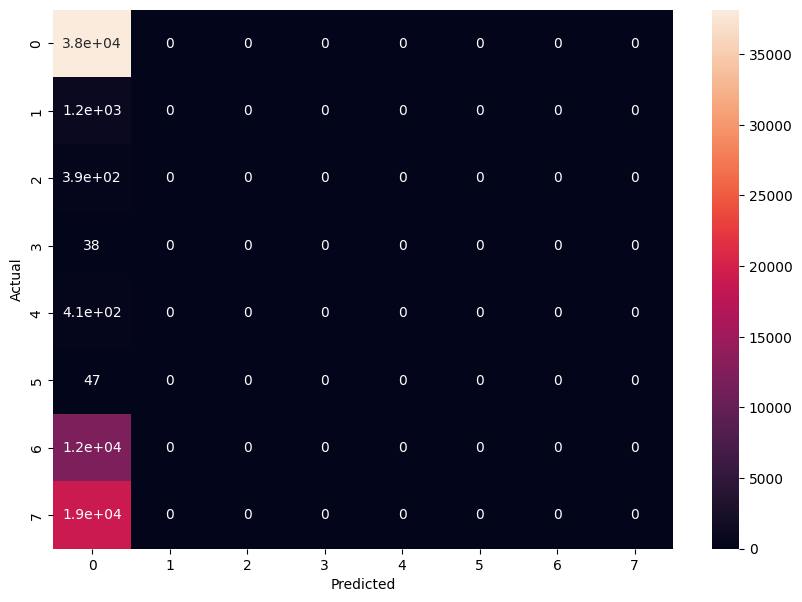

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes1)

# Visualización
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [23]:
import numpy as np 
# Tamaño del lote
batch_size = 1000

# Número de lotes
num_batches = int(np.ceil(X_test.shape[0] / float(batch_size)))

# Inicializar las predicciones
y_pred = np.zeros((X_test.shape[0], y.max()+1))

# Hacer predicciones en cada lote
for i in range(num_batches):
    start = i * batch_size
    end = min((i+1) * batch_size, X_test.shape[0])
    y_pred[start:end] = model_rnn.predict(X_test[start:end].toarray())

# Obtener las clases predichas
y_pred_classes2 = np.argmax(y_pred, axis=1)

11/11 [==============================] - 3s 257ms/step


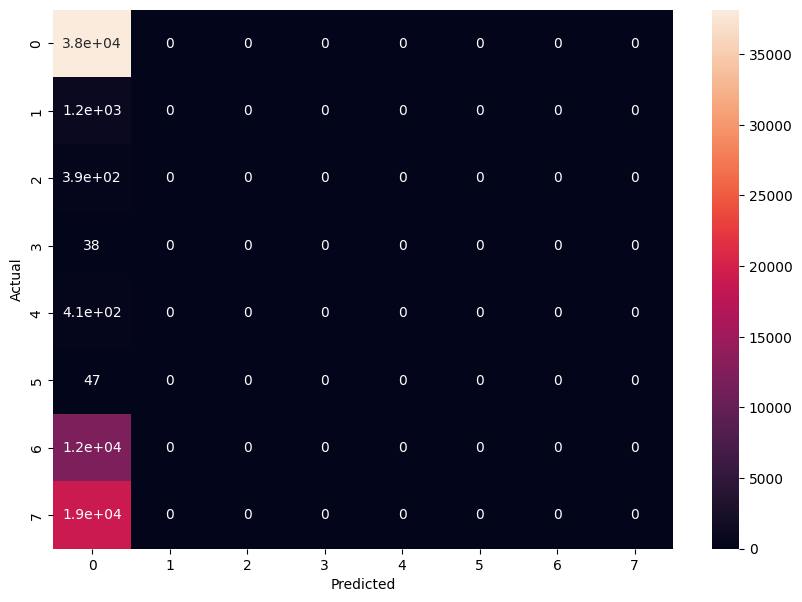

In [24]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes2)

# Visualización
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

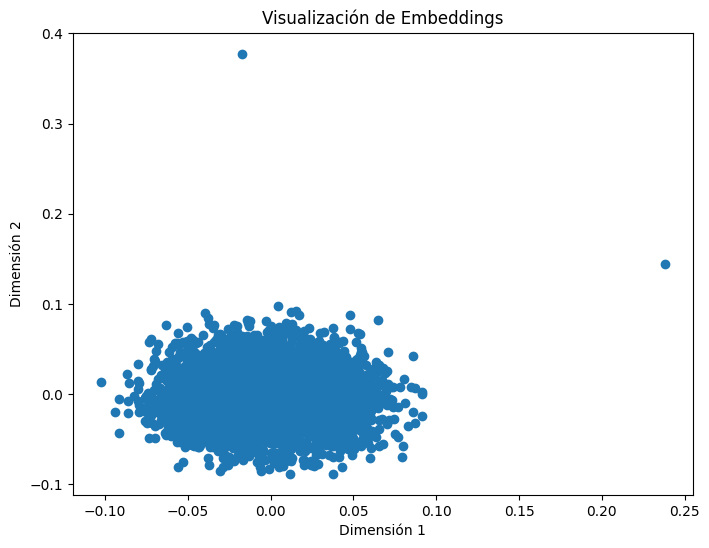

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Obtener los embeddings del modelo, asumiendo que tienes una capa de embeddings llamada 'embedding'
embeddings = model_cnn.get_layer('embedding').get_weights()[0]

# Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Trazar los embeddings
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.title('Visualización de Embeddings')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()


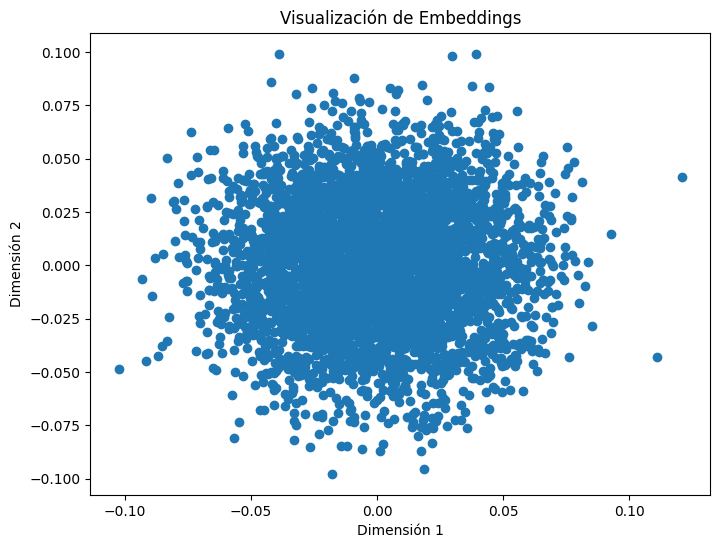

In [41]:


# Obtener los embeddings del modelo, asumiendo que tienes una capa de embeddings llamada 'embedding'
embeddings = model_rnn.get_layer('embedding_1').get_weights()[0]

# Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Trazar los embeddings
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.title('Visualización de Embeddings')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()
